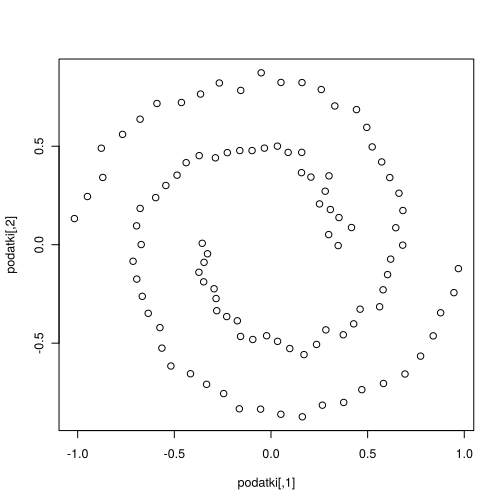

In [1]:
library(mlbench)

set.seed(111)
objekt <- mlbench.spirals(100,1,0.025)
podatki <- objekt$x
plot(podatki)

In [2]:
#library(mlbench)

#set.seed(5)
#objekt <- mlbench.smiley(n=100, sd1 = 0.1, sd2 = 0.025)
#podatki <-  objekt$x
#plot(podatki)

Potrebujem matriko, ki doloca, kako blizu sta x in y med seboj. Za mero bom izbral Gaussian Kernel: ce sta dve tocki blizu, je GK ~ 1, ce pa sta dalec narazen pa GK ~ 0. Dodaten pogoj: ce norma med tockama xi in xj vec kot r, bo S[i,j] = 0.

In [3]:
s <- function(x1, x2, alpha=1) {
    exp(- alpha * norm(as.matrix(x1-x2), type="F")) #frobeniusova norma
}

In [4]:
podobnostna.matrika <- function(podatki, razdalja, r = 1) {
  N <- nrow(podatki)
  S <- matrix(rep(NA,N^2), ncol=N) #ustvarim prazno matriko
  for(i in 1:N) {
    for(j in 1:N) {
        if (norm(as.matrix(podatki[i,]-podatki[j,]), type="F") >= r) {
            S[i,j] <- 0
        } else {
            S[i,j] <- razdalja(podatki[i,], podatki[j,])
       }
    }
  }
  S
}

In [5]:
S <- podobnostna.matrika(podatki, s, 0.2) #problem negativnih lastnih vrednosti, ce bo r majhen
#S[1:8,1:8]

Tip grafa: k-najblizjih sosedov, popoln graf (st.sosedov = N )

In [6]:
affinity.matrika <- function(S, st.sosedov=2) {
  N <- length(S[,1])

  if (st.sosedov >= N) { #poln graf
    A <- S
  } else {
    A <- matrix(rep(0,N^2), ncol=N) #prazna matrika
    for(i in 1:N) {
      najboljsa.ujemanja <- sort(S[i,], decreasing=TRUE)[1:st.sosedov] #povezem tiste, kateri so blizji
      for (s in najboljsa.ujemanja) {
        j <- which(S[i,] == s)
        A[i,j] <- S[i,j]
        A[j,i] <- S[i,j] #simetricna matrika - neusmerjen graf
      }
    }
  }
  A  
}


In [7]:
A <- affinity.matrika(S, 5) #povezem tiste, ki imajo visoke vrednosti
#A[1:8,1:8]

In [8]:
D <- diag(apply(A, 1, sum)) #vsota vrstic
#D[1:8,1:8]

Poracunam nenormalizirana Laplaceovo matriko (U = D - A)

In [9]:
U <- D - A
#round(U[1:12,1:12],1)

Stevilo k je stevilo dreves, v katere hocem povezat podatke. Poracunam prvih k-najmanjsih lastnih vektorjev.

In [10]:
k   <- 2
lastne_vrednosti <- eigen(U, symmetric = TRUE)
Z   <- lastne_vrednosti$vectors[,(ncol(lastne_vrednosti$vectors)-k+1):ncol(lastne_vrednosti$vectors)]

i-ta vrstica Z definira transformacijo xi. Na grafu se vidi, ali so skupine dobro locene. 

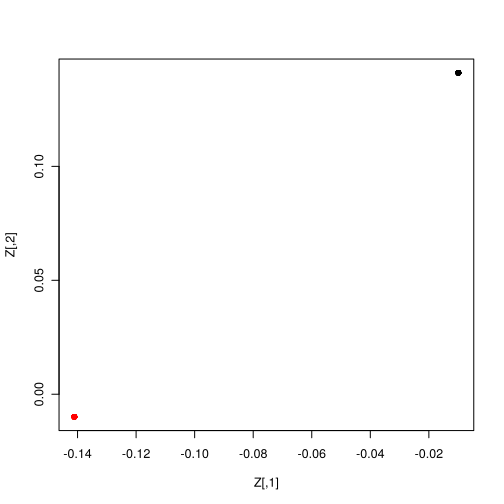

In [11]:
plot(Z, col=objekt$classes, pch=20)

Uporabim k-means algoritem.

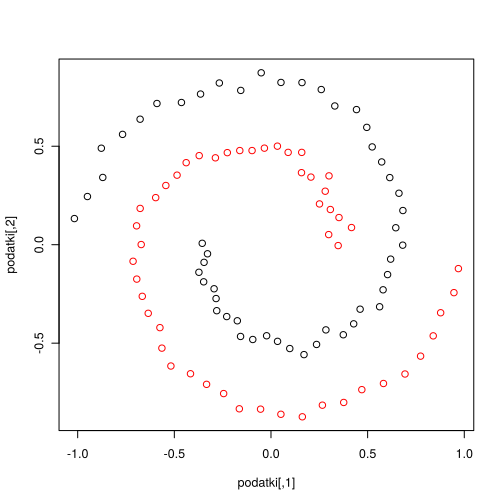

In [12]:
library(stats)
km <- kmeans(Z, centers=k)
plot(podatki, col=km$cluster)

In [13]:
lastne_vrednosti$values[lastne_vrednosti$values <= 0] <- 1e-16 #problem negativnih lastnih vrednosti
signif(lastne_vrednosti$values,2) #absolutne lastne vrednosti, saj pridejo nekatere negativne

6.6 
 6.5 
 5.9 
 5.8 
 5.6 
 5.5 
 5.5 
 5.5 
 5.4 
 5.4 
 5.4 
 5.3 
 5.2 
 5.2 
 5.2 
 5.2 
 5 
 5 
 4.9 
 4.9 
 4.8 
 4.7 
 4.7 
 4.6 
 4.6 
 4.5 
 4.5 
 4.5 
 4.5 
 4.5 
 4.4 
 4.3 
 4.3 
 4.2 
 4.2 
 4.1 
 4 
 4 
 3.9 
 3.9 
 3.8 
 3.8 
 3.7 
 3.7 
 3.7 
 3.6 
 3.6 
 3.5 
 3.5 
 3.5 
 3.4 
 3.4 
 3.3 
 3.2 
 3.1 
 3 
 2.9 
 2.9 
 2.7 
 2.7 
 2.6 
 2.5 
 2.3 
 2.2 
 2.2 
 2 
 2 
 1.9 
 1.7 
 1.7 
 1.6 
 1.5 
 1.4 
 1.3 
 1.2 
 1.2 
 1 
 1 
 0.84 
 0.83 
 0.74 
 0.7 
 0.55 
 0.55 
 0.46 
 0.42 
 0.32 
 0.32 
 0.23 
 0.22 
 0.15 
 0.14 
 0.083 
 0.079 
 0.037 
 0.036 
 0.0091 
 0.0087 
 7.2e-16 
 1e-16

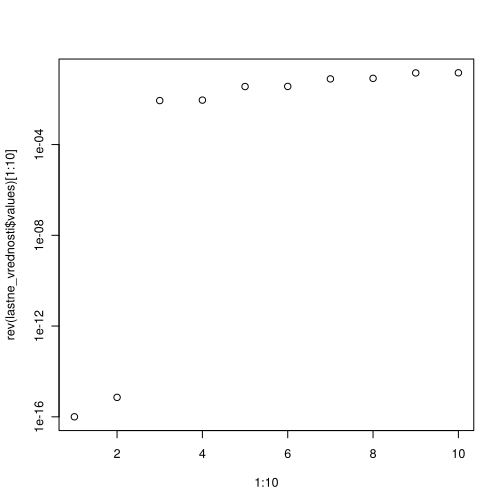

In [14]:
plot(1:10, rev(lastne_vrednosti$values)[1:10], log = "y")